In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import *
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import SGDRegressor
# from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# 1.获取数据

In [3]:
data = load_boston()
X = data.data
y = data.target

CRIM：城镇的人均犯罪率

ZN：大于25,000平方英尺的地块的住宅用地比例

INDUS：每个镇的非零售业务英亩的比例。RMmm

CHAS：查尔斯河虚拟变量（如果环河，则等于1；否则等于0）

NOX：一氧化氮的浓度（百万分之几）

RM：每个住宅的平均房间数

AGE：1940年之前建造的自有住房的比例

DIS：到五个波士顿就业中心的加权距离

RAD：径向公路通达性的指标

TAX：每$ 10,000的全值财产税率

PTRATIO：各镇的师生比率

B：计算方法为1000（Bk-0.63）²，其中Bk是按城镇划分的非裔美国人的比例

LSTAT：底层人口的百分比

MEDV：自有住房数的中位数，单位为$ 1000

# 2.划分训练集和测试集

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)
#The data frame of training data
train_df = pd.DataFrame(X_train, columns = data.feature_names)
#The data frame of testing data
test_df = pd.DataFrame(X_test, columns = data.feature_names)
#We concatenate them training and testing together for the convenience of data processing
df = pd.concat([train_df,test_df],ignore_index=True,sort=False)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))
test_set = {"y_test":y_test}
test_set = pd.DataFrame(test_set)
test_set.to_csv('y_test.csv')
df

404
102
404
102


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98
1,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
2,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
3,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.32982,0.0,21.89,0.0,0.624,5.822,95.4,2.4699,4.0,437.0,21.2,388.69,15.03
502,0.15936,0.0,6.91,0.0,0.448,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
503,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10
504,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77


# 3.探索性数据分析

### 3.1各个特征的的特征分布直方图

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

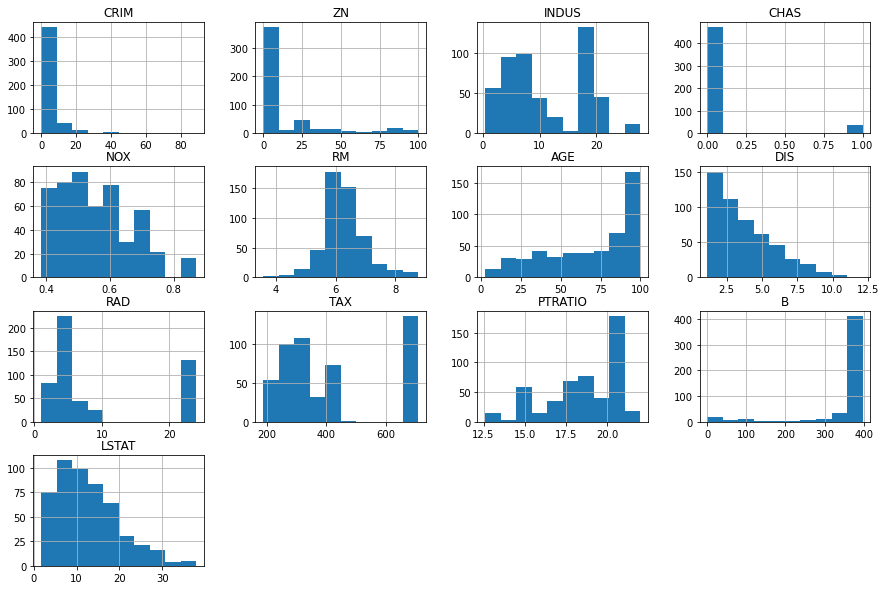

In [5]:
# 特征直方图
df.hist(figsize=(15,10))

### 3.2各个特征与房价的关系散点图

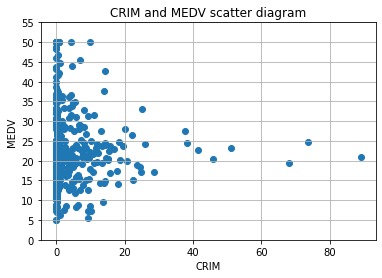

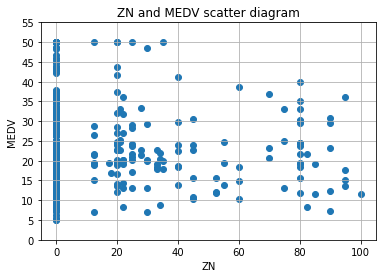

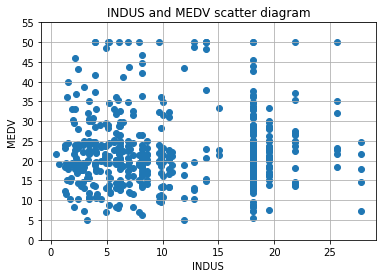

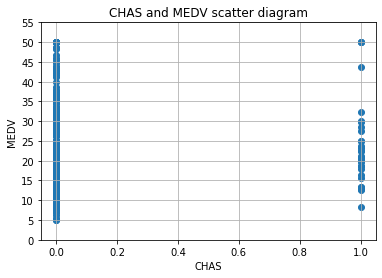

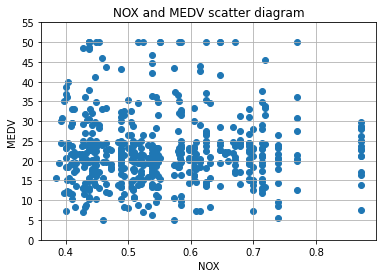

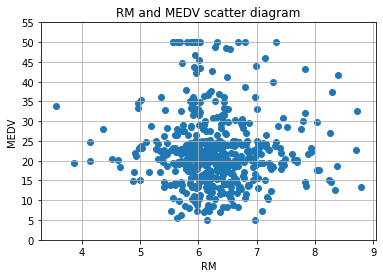

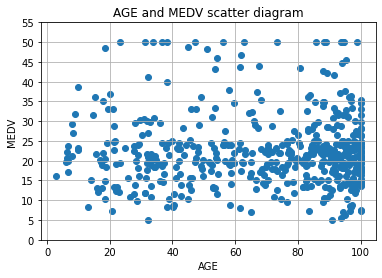

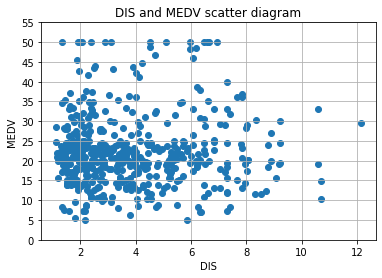

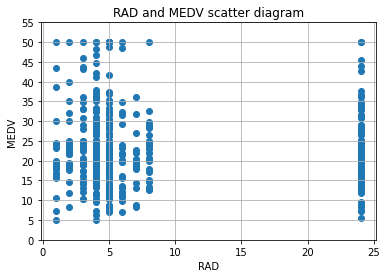

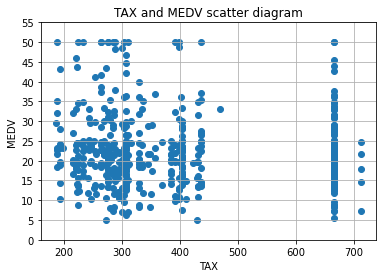

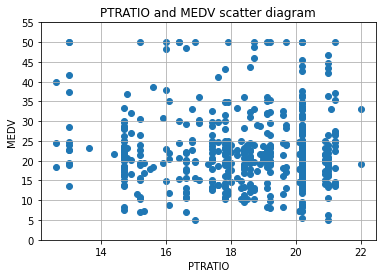

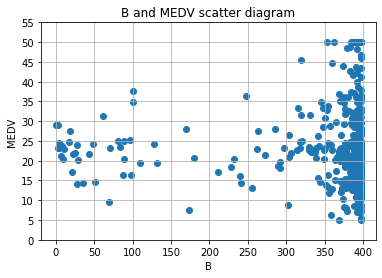

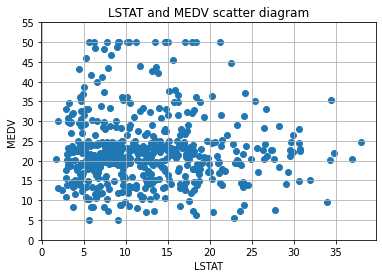

In [6]:
for each in data.feature_names:
    plt.scatter(df[each],y)
    plt.title(each + ' and MEDV scatter diagram')
    plt.xlabel(each)
    plt.ylabel('MEDV')
    plt.yticks(range(0,60,5))
    plt.grid()
    plt.show()

### 3.3热力图

<AxesSubplot:>

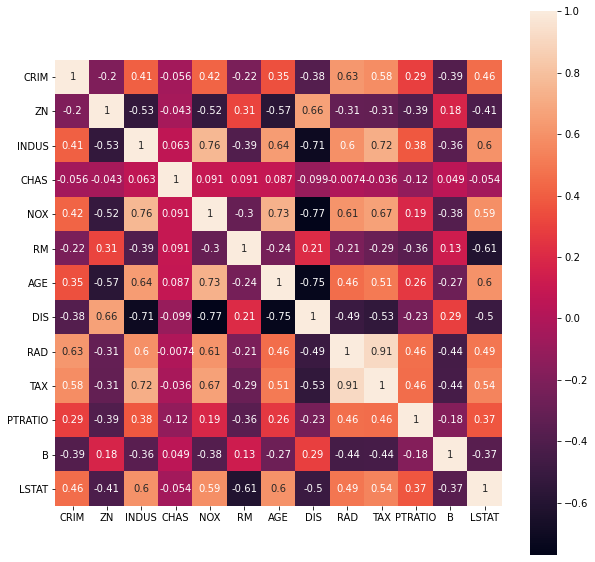

In [7]:
corr = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, square=True, annot=True)

### 3.4房价分布图

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

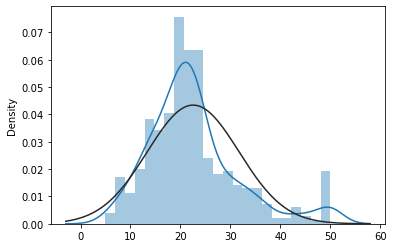

In [8]:
sns.distplot(y,fit=stats.norm)

### 3.5概率图

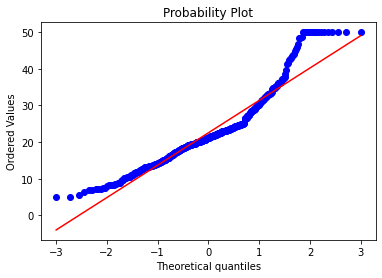

In [9]:
res = stats.probplot(y, plot=plt)

# 4.数据处理

### 4.1对数变换

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

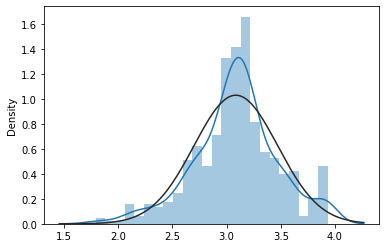

In [10]:
y_log = np.log1p(y)
sns.distplot(y_log, fit=stats.norm)

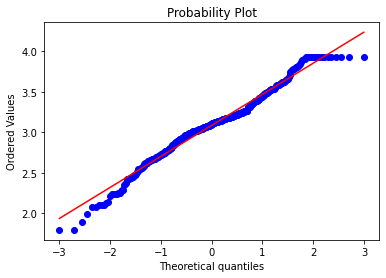

In [11]:
res = stats.probplot(y_log, plot=plt)

In [12]:
test_reg = Ridge()
test_reg.fit(X_train, y_train)
test_reg_y_predict = test_reg.predict(X_test)
test_reg_score = r2_score(y_test, test_reg_y_predict)
print ("R^2 score of the test model before log transforamtion:{:,.10f}".format(test_reg_score))
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
test_reg_log = Ridge()
test_reg_log.fit(X_train, y_train_log)
test_reg_y_predict_log = test_reg_log.predict(X_test)
test_reg_score_log = r2_score(y_test_log, test_reg_y_predict_log)
print ("R^2 score of the test model after log transforamtion:{:,.10f}".format(test_reg_score_log))

R^2 score of the test model before log transforamtion:0.6816407322
R^2 score of the test model after log transforamtion:0.7219696773


In [13]:
# test2_reg = SVR()
# test2_reg.fit(X_train, y_train)
# test2_reg_y_predict = test2_reg.predict(X_test)
# test2_reg_score = r2_score(y_test, test2_reg_y_predict)
# print ("R^2 score of the test model2 before log transforamtion:{:,.10f}".format(test2_reg_score))

# test2_reg_log = SVR()
# test2_reg_log.fit(X_train, y_train_log)
# test2_reg_y_predict_log = test2_reg_log.predict(X_test)
# test2_reg_score_log = r2_score(y_test_log, test2_reg_y_predict_log)
# print ("R^2 score of the test model2 after log transforamtion:{:,.10f}".format(test2_reg_score_log))

### 4.2缺失值处理

In [14]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### 4.3删除一些特征

In [15]:
y_train_df = pd.DataFrame(y_train, columns = ['house_price'])
y_test_df = pd.DataFrame(y_test, columns = ['house_price'])
y_df = pd.concat([y_train_df,y_test_df],ignore_index=True,sort=False)
xy_df = pd.concat([df,y_df],axis=1)
xy_df.to_csv('boston.csv')
xy_df.corr()['house_price']

CRIM          -0.388305
ZN             0.360445
INDUS         -0.483725
CHAS           0.175260
NOX           -0.427321
RM             0.695360
AGE           -0.376955
DIS            0.249929
RAD           -0.381626
TAX           -0.468536
PTRATIO       -0.507787
B              0.333461
LSTAT         -0.737663
house_price    1.000000
Name: house_price, dtype: float64

<AxesSubplot:>

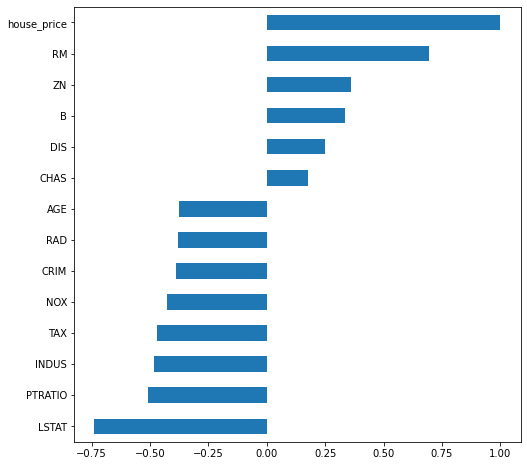

In [16]:
corr = xy_df.corr()['house_price']
corr_plot = corr.copy()
corr_plot.sort_values(ascending=True,inplace=True)
corr_plot.plot.barh(figsize=(8,8))

In [17]:
feature_names = load_boston().feature_names
score = {}
print("Before removing any features:")
test_reg = Ridge()
test_reg.fit(X_train, y_train)
test_reg_y_predict = test_reg.predict(X_test)
test_reg_score = r2_score(y_test, test_reg_y_predict)
print ("R^2 score of the test model:{:,.10f}".format(test_reg_score))
# score_0 = test_result(X_train,y_train,X_test,y_test,Lasso())
score['Original'] = test_reg_score
#w.append(score_0)
for i in range(13):
    X_train_d = np.delete(X_train,i,axis=1)
    X_test_d = np.delete(X_test,i,axis=1)
#     print ("Model that %s has been removed: "%(feature_names[i]))
    test_reg_d = Ridge()
    test_reg_d.fit(X_train_d, y_train)
    test_reg_y_predict_d = test_reg_d.predict(X_test_d)
    test_reg_score_d = r2_score(y_test, test_reg_y_predict_d)
    print ("After removing %s: "%(feature_names[i]))
    print ("R^2 score of the test model:{:,.10f}".format(test_reg_score_d))
#     score = test_result(X_train_tmp,y_train,X_test_tmp,y_test,Lasso())
    score[feature_names[i]] = test_reg_score_d

Before removing any features:
R^2 score of the test model:0.6816407322
After removing CRIM: 
R^2 score of the test model:0.6856170444
After removing ZN: 
R^2 score of the test model:0.6664230707
After removing INDUS: 
R^2 score of the test model:0.6815856576
After removing CHAS: 
R^2 score of the test model:0.6826652669
After removing NOX: 
R^2 score of the test model:0.6629871769
After removing RM: 
R^2 score of the test model:0.6413203629
After removing AGE: 
R^2 score of the test model:0.6818477898
After removing DIS: 
R^2 score of the test model:0.6246593144
After removing RAD: 
R^2 score of the test model:0.6574795642
After removing TAX: 
R^2 score of the test model:0.6681304224
After removing PTRATIO: 
R^2 score of the test model:0.6492138623
After removing B: 
R^2 score of the test model:0.6674864669
After removing LSTAT: 
R^2 score of the test model:0.6093221410


<AxesSubplot:>

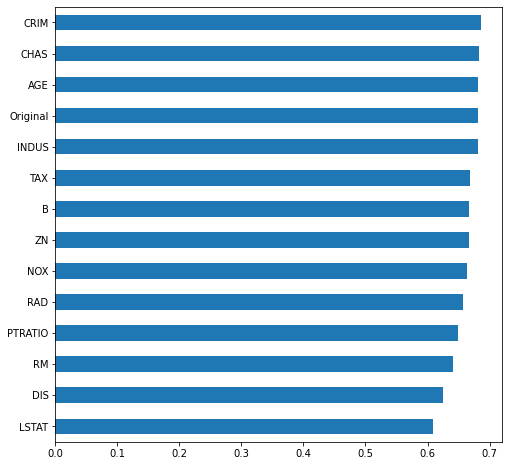

In [18]:
score = pd.Series(score)
score_plot = score.copy()
score_plot.sort_values(ascending=True,inplace=True)
score_plot.plot.barh(figsize=(8,8))

# 5.特征工程

### 特征偏度

In [19]:
# from scipy.stats import norm,skew

# numeric_feats = df.select_dtypes(exclude=['object']).columns
# skewed_feats = df[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
# print('\n Skew in numerical features:\n')
# skewness = pd.DataFrame({'Skew':skewed_feats})
# skewness.head(10)

### 用box-cox变换来处理

In [20]:
# skewness = skewness[abs(skewness)>0.75]
# print('{}skewed features'.format(skewness.shape[0]))

# skewed_feats = skewness.index
# lam = 0.15
# for feat in skewed_feats:
#     df[feat] = boxcox1p(df[feat],lam)

### 最后进行one-hot 编码

In [21]:
# df = pd.get_demmies(df)
# print(df.shape)

### 数据增强

In [22]:
split_features = {
    'CRIM':3,
    'ZN':3,
    'INDUS':4,
    'NOX':5,
    'RM':3,
    'AGE':7,
    'DIS':3,
    'RAD':2,
    'TAX':4,
    'PTRATIO':3,
    'B':4,
    'LSTAT':5
}

In [23]:
concat_df = df
for k,v in split_features.items():
    new_feat = pd.cut(df[k],v)
    #One-hot encoder
    onehot_feat = pd.get_dummies(new_feat,prefix=k)
    concat_df = pd.concat([concat_df, onehot_feat], axis=1)
concat_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,"PTRATIO_(18.867, 22.0]","B_(-0.0766, 99.465]","B_(99.465, 198.61]","B_(198.61, 297.755]","B_(297.755, 396.9]","LSTAT_(1.694, 8.978]","LSTAT_(8.978, 16.226]","LSTAT_(16.226, 23.474]","LSTAT_(23.474, 30.722]","LSTAT_(30.722, 37.97]"
0,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,...,1,0,0,0,1,1,0,0,0,0
1,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,...,1,0,0,0,1,1,0,0,0,0
2,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,...,1,0,0,0,1,0,1,0,0,0
3,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,...,0,0,0,0,1,1,0,0,0,0
4,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,...,0,0,0,0,1,0,0,1,0,0
5,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,...,1,0,0,0,1,1,0,0,0,0
6,0.08199,0.0,13.92,0.0,0.437,6.009,42.3,5.5027,4.0,289.0,...,0,0,0,0,1,0,1,0,0,0
7,0.34006,0.0,21.89,0.0,0.624,6.458,98.9,2.1185,4.0,437.0,...,1,0,0,0,1,0,1,0,0,0
8,6.44405,0.0,18.10,0.0,0.584,6.425,74.8,2.2004,24.0,666.0,...,1,1,0,0,0,0,1,0,0,0
9,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,...,0,0,0,0,1,0,1,0,0,0


### 标准化

In [24]:
print(X_test[0])
# X_test=np.append(X_test,[2.818380,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,392.92,10.42])
d=np.array([2.81838e+00,0.00000e+00,1.81000e+01,0.00000e+00,5.32000e-01,5.76200e+00,4.03000e+01,4.09830e+00,2.40000e+01,6.66000e+02,2.02000e+01,3.92920e+02,1.04200e+01])
X_test0=np.insert(X_test,0,d,axis=0)
print(X_test0)
transfer  = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.fit_transform(X_test)
print(X_test0[0])
X_test0 = transfer.fit_transform(X_test0)
print(X_test0[0])

[2.81838e+00 0.00000e+00 1.81000e+01 0.00000e+00 5.32000e-01 5.76200e+00
 4.03000e+01 4.09830e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.92920e+02
 1.04200e+01]
[[2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [2.81838e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.92920e+02
  1.04200e+01]
 [4.54400e-02 0.00000e+00 3.24000e+00 ... 1.69000e+01 3.68570e+02
  9.09000e+00]
 ...
 [2.68380e-01 0.00000e+00 9.69000e+00 ... 1.92000e+01 3.96900e+02
  1.41000e+01]
 [1.11081e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  3.47700e+01]
 [5.44114e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.55290e+02
  1.77300e+01]]
[2.81838e+00 0.00000e+00 1.81000e+01 0.00000e+00 5.32000e-01 5.76200e+00
 4.03000e+01 4.09830e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.92920e+02
 1.04200e+01]
[ 0.12722226 -0.44099479  1.02862428 -0.27003086 -0.15857215 -0.6986739
 -0.96437847  0.12615251  1.94722607  1.75620093  0.82571281  0.33986867
 -0.34642743]


# 6.建模对比

## 6.1线性回归模型

### 方法一：线性回归  log

In [25]:
# 创建模型 实例化估计器 # 线性回归模块实例化一个对象
lin_reg = LinearRegression()
# 训练模型 fit 正规方程计算得到最优的可训练参数 # 用线性回归模块在训练集上进行拟合
lin_reg.fit(X_train, y_train_log)
# 获取预测值
lin_reg_y_predict=lin_reg.predict(X_test)
lin_reg_score = r2_score(y_test_log, lin_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(lin_reg_score))
lin_reg_y_predict

R^2 score 0.6645740822 on test data.


array([3.09991598, 3.1481634 , 3.39441833, 2.78017077, 2.38942475,
       2.78872525, 3.20599756, 3.30852657, 3.33292678, 2.90381834,
       3.22698316, 3.48645081, 2.4996232 , 3.14281915, 3.15817907,
       3.49806443, 2.80770331, 2.93502074, 3.11062508, 2.90180087,
       3.29106004, 3.30274066, 3.0117067 , 3.50575342, 3.0328315 ,
       1.97545823, 3.75334476, 2.93200042, 3.22352151, 3.22703403,
       3.29067698, 3.54054492, 3.2125636 , 3.4185683 , 3.2880477 ,
       3.52324213, 3.29300783, 3.28667084, 2.02866859, 3.40517474,
       3.16344681, 3.28040321, 2.79247261, 2.79686683, 3.00792228,
       3.01616937, 3.18037337, 3.58867585, 3.01729245, 2.94378409,
       2.16117449, 3.40348995, 3.20280071, 3.88253022, 3.35620242,
       2.2232303 , 3.43862253, 3.65642534, 3.37106856, 3.11207782,
       3.20190491, 3.0284252 , 2.85555469, 2.89554645, 3.29552503,
       3.41974236, 3.31862129, 3.29347363, 3.25963995, 3.7155864 ,
       3.40849236, 3.61291919, 3.03199814, 3.34463194, 2.45104

In [26]:
def figure_prediction(y_real, y_predict):
    plt.figure(figsize=(20,5))
    plt.plot(np.arange(0,y_real.shape[0]), y_real, c='red', linestyle='--')
    plt.plot(np.arange(0,y_real.shape[0]), y_predict, c='green', linestyle='-.')

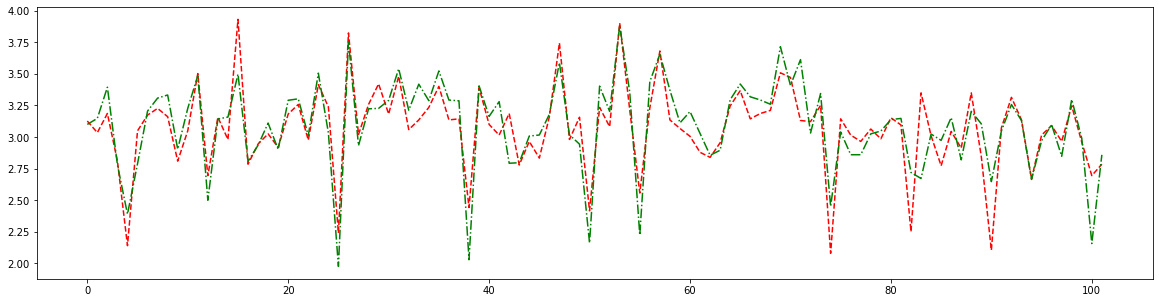

In [27]:
figure_prediction(y_test_log, lin_reg_y_predict)

### 方法二：随机参数回归 log

In [28]:
# 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
sgd_reg = SGDRegressor(max_iter=1000,tol=0.001)#tol=0.001是指的是每次迭代是否损失函数越来越小，如果损失函数的值小于0.001的话就停止迭代
# 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
sgd_reg.fit(X_train, y_train_log)
# 获取预测值
sgd_reg_y_predict = sgd_reg.predict(X_test)
sgd_reg_score = r2_score(y_test_log, sgd_reg_y_predict)
print("R^2 score {:,.10f} on test data.".format(sgd_reg_score))
sgd_reg_y_predict

R^2 score 0.6737703206 on test data.


array([3.07561431, 3.19397144, 3.33973106, 2.82265812, 2.4423432 ,
       2.79085742, 3.17505554, 3.30057115, 3.30401595, 2.9832005 ,
       3.17706278, 3.47209486, 2.56823292, 3.12752745, 3.13367236,
       3.49471633, 2.82457742, 2.97045336, 3.07463349, 2.91449987,
       3.27807563, 3.29657148, 3.04254096, 3.49945376, 3.0683795 ,
       2.04714891, 3.73312785, 2.94686433, 3.20010391, 3.19377462,
       3.28735558, 3.51862327, 3.19546655, 3.37928176, 3.2808805 ,
       3.50834589, 3.30442917, 3.24109341, 2.06168839, 3.35495275,
       3.18256865, 3.24515409, 2.81000306, 2.80125869, 3.02061265,
       2.96219885, 3.16571994, 3.56150127, 3.0317855 , 2.91594682,
       2.18453082, 3.36434903, 3.19796974, 3.82176285, 3.31128846,
       2.22310354, 3.3984502 , 3.6646328 , 3.35621113, 3.0778196 ,
       3.21091762, 3.04944973, 2.8736127 , 2.91109611, 3.28857416,
       3.4060652 , 3.29151776, 3.2797285 , 3.23716084, 3.69199037,
       3.42631069, 3.67397872, 3.068471  , 3.30452793, 2.55409

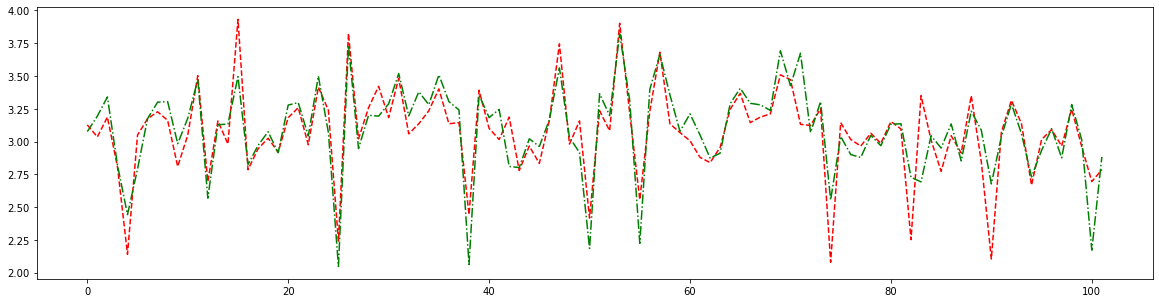

In [29]:
figure_prediction(y_test_log, sgd_reg_y_predict)

### 网格搜索

In [30]:
# Scikit中使用Grid_Search来获取模型的最佳参数
def grid_search(model, X, y, params):
    grid = GridSearchCV(estimator = model, param_grid = params, scoring = "r2", cv = 5)
    grid.fit(X,y)
    # 指定模型为效果最好参数对应的模型
    best_model = grid.best_estimator_
    # 查看最佳分数和最佳参数
    print("Parameters are {} for the optimal model.".format(grid.best_params_))
    print("Optimal model has best score {:,.10f}.".format(grid.best_score_))
    for i in range(len(grid.cv_results_['mean_test_score'])):
        print(grid.cv_results_['params'][i], "Test score: {:,.10f}".format(grid.cv_results_['mean_test_score'][i]))
#         print(grid.cv_results_['params'][i], "Test score: {:,.10f}".format(grid.score(X, y)))
    return best_model

### 方法三：岭回归 log

In [31]:
# training set
ridge_reg = grid_search(Ridge(),X_train,y_train_log,{'alpha':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]})
# 利用最佳模型来进行预测
ridge_reg_y_predict = ridge_reg.predict(X_test)
ridge_score = r2_score(y_test_log, ridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(ridge_score))
ridge_reg_y_predict

Parameters are {'alpha': 10} for the optimal model.
Optimal model has best score 0.7914954146.
{'alpha': 0.001} Test score: 0.7910541613
{'alpha': 0.01} Test score: 0.7910572027
{'alpha': 0.05} Test score: 0.7910706178
{'alpha': 0.1} Test score: 0.7910871544
{'alpha': 0.5} Test score: 0.7912104852
{'alpha': 1} Test score: 0.7913437575
{'alpha': 10} Test score: 0.7914954146
{'alpha': 20} Test score: 0.7896578728
Optimal model has R^2 score 0.6658199515 on test data.


array([3.07566275, 3.1807755 , 3.37594139, 2.79519732, 2.40752657,
       2.77845082, 3.20089934, 3.30636207, 3.3187472 , 2.93511186,
       3.21432661, 3.49209372, 2.53689804, 3.14258567, 3.1488082 ,
       3.47280361, 2.82497434, 2.94857145, 3.08255939, 2.91384167,
       3.28553903, 3.30002395, 3.04666167, 3.50022677, 3.04745763,
       2.00801583, 3.74103901, 2.94046661, 3.20720079, 3.21610485,
       3.30010681, 3.5233538 , 3.20361035, 3.40538123, 3.29108097,
       3.51491996, 3.29403173, 3.27164627, 2.04034423, 3.38120738,
       3.17291648, 3.27225416, 2.79014206, 2.78646756, 3.02044364,
       3.00192461, 3.17352014, 3.56786625, 3.02877934, 2.93919677,
       2.16918034, 3.38515098, 3.20205145, 3.85499147, 3.33887393,
       2.21266488, 3.41108588, 3.66447441, 3.37844636, 3.10922431,
       3.20525904, 3.03853523, 2.85361413, 2.91839515, 3.30746357,
       3.41609375, 3.30768313, 3.28908018, 3.24527863, 3.70021746,
       3.42203246, 3.62368712, 3.04919282, 3.33516093, 2.50323

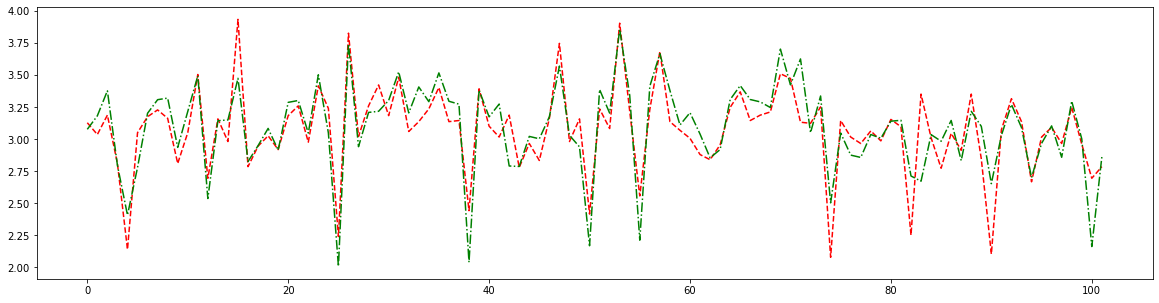

In [32]:
figure_prediction(y_test_log, ridge_reg_y_predict)

In [33]:
# testing set
ridge_alpha = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10, 20]
for i in ridge_alpha:
    # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
    ridge_reg = Ridge(alpha=i)#(alpha表示正则的程度）
    # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
    ridge_reg.fit(X_train, y_train_log)
    # 模型评估
    # 获取系数等值
    ridge_reg_y_predict = ridge_reg.predict(X_test)
    ridge_reg_score = r2_score(y_test_log, ridge_reg_y_predict)
    print ("alpha:{:,}   ".format(i), "R^2 score:{:,.10f}".format(ridge_reg_score))
#     print("预测值为:\n", ridge_reg_y_predict)
#     print("模型中的系数为:\n", ridge_reg.coef_)
#     print("模型中的偏置为:\n", ridge_reg.intercept_)

alpha:0.001    R^2 score:0.6645744203
alpha:0.01    R^2 score:0.6645774595
alpha:0.05    R^2 score:0.6645908940
alpha:0.1    R^2 score:0.6646075194
alpha:0.5    R^2 score:0.6647340464
alpha:1    R^2 score:0.6648770429
alpha:10    R^2 score:0.6658199515
alpha:20    R^2 score:0.6655517586


### 模型评估 MSE（均方误差，越小越好）

In [34]:
# 计算均方误差,越小越好
ridge_reg_MSE = mean_squared_error(y_true=y_test_log, y_pred=ridge_reg_y_predict)
ridge_reg_MSE

0.0370980484097857

### 方法四：贝叶斯岭回归 log

In [35]:
# training set
bridge_reg = grid_search(BayesianRidge(),X_train,y_train_log,{})
# 利用最佳模型来进行预测
bridge_reg_y_predict = bridge_reg.predict(X_test)
bridge_score = r2_score(y_test_log, bridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(bridge_score))
bridge_reg_y_predict

Parameters are {} for the optimal model.
Optimal model has best score 0.7916508857.
{} Test score: 0.7916508857
Optimal model has R^2 score 0.6655393405 on test data.


array([3.08740929, 3.16632297, 3.38435922, 2.78788243, 2.39845483,
       2.78332793, 3.20307916, 3.30740909, 3.32596421, 2.92029569,
       3.22000219, 3.48940057, 2.51846486, 3.1425701 , 3.15276936,
       3.48585946, 2.81638139, 2.94232706, 3.09615341, 2.90789311,
       3.28817358, 3.30132265, 3.03017335, 3.50343871, 3.04093049,
       1.99156299, 3.74724772, 2.93693768, 3.21530988, 3.22106115,
       3.29554852, 3.53183721, 3.20800877, 3.4116116 , 3.28943793,
       3.51917539, 3.29380177, 3.27819283, 2.03405462, 3.39226301,
       3.16921247, 3.27623855, 2.79113082, 2.79139805, 3.0143199 ,
       3.00781399, 3.17656949, 3.57843457, 3.02391092, 2.94077626,
       2.16466057, 3.39369867, 3.20289099, 3.86794385, 3.34679633,
       2.21736092, 3.42480183, 3.66143747, 3.3751857 , 3.11010165,
       3.20455182, 3.03411531, 2.85444223, 2.90699491, 3.30176767,
       3.41795933, 3.31308428, 3.29147053, 3.25242757, 3.70788415,
       3.41602206, 3.61932055, 3.04154788, 3.33917119, 2.47983

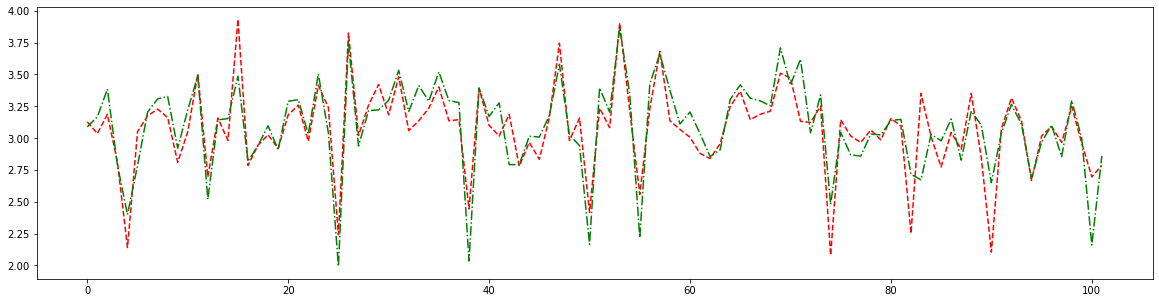

In [36]:
figure_prediction(y_test_log, bridge_reg_y_predict)

In [37]:
# testing set
# 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
bridge_reg = BayesianRidge()#(alpha表示正则的程度）
# 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
bridge_reg.fit(X_train, y_train_log)
# 模型评估
# 获取系数等值
bridge_reg_y_predict = bridge_reg.predict(X_test)
bridge_reg_score = r2_score(y_test_log, bridge_reg_y_predict)
print ("R^2 score:{:,.10f}".format(bridge_reg_score))

R^2 score:0.6655393405


### 方法五：Lasso回归 log

In [38]:
# training set
lasso_reg = grid_search(Lasso(),X_train,y_train_log,{'alpha': [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1], 'max_iter':[10000]})
# 利用最佳模型来进行预测
lasso_reg_y_predict = lasso_reg.predict(X_test)
lasso_score = r2_score(y_test_log, lasso_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(lasso_score))
lasso_reg_y_predict

Parameters are {'alpha': 0.001, 'max_iter': 10000} for the optimal model.
Optimal model has best score 0.7912468200.
{'alpha': 0.001, 'max_iter': 10000} Test score: 0.7912468200
{'alpha': 0.005, 'max_iter': 10000} Test score: 0.7864386868
{'alpha': 0.01, 'max_iter': 10000} Test score: 0.7766929808
{'alpha': 0.02, 'max_iter': 10000} Test score: 0.7597821061
{'alpha': 0.03, 'max_iter': 10000} Test score: 0.7499404399
{'alpha': 0.04, 'max_iter': 10000} Test score: 0.7366029669
{'alpha': 0.05, 'max_iter': 10000} Test score: 0.7230197826
{'alpha': 0.1, 'max_iter': 10000} Test score: 0.6306112776
Optimal model has R^2 score 0.6650999820 on test data.


array([3.08964077, 3.17517229, 3.38220658, 2.79241257, 2.3981984 ,
       2.78479095, 3.20264754, 3.31034188, 3.33082498, 2.92509109,
       3.2170205 , 3.48453283, 2.51732303, 3.14476315, 3.15538987,
       3.48674055, 2.81387482, 2.93745919, 3.09334407, 2.9080596 ,
       3.29092053, 3.30517897, 3.03298884, 3.51071839, 3.04611987,
       1.99080668, 3.74633716, 2.93724175, 3.21558255, 3.22244585,
       3.29292068, 3.53875733, 3.20959423, 3.4100388 , 3.29209344,
       3.51965873, 3.29398985, 3.27625826, 2.03311022, 3.3885448 ,
       3.17227139, 3.27403977, 2.79082322, 2.79152784, 3.01313087,
       3.00259626, 3.17923097, 3.57687375, 3.02360424, 2.93734869,
       2.16192755, 3.39253955, 3.2039073 , 3.86077426, 3.34668352,
       2.21907439, 3.42453573, 3.66238908, 3.37465001, 3.10723143,
       3.20797115, 3.0362306 , 2.85361226, 2.90672907, 3.30006939,
       3.41954736, 3.31630418, 3.29689149, 3.25068727, 3.7065741 ,
       3.41828337, 3.6173018 , 3.04505799, 3.33616093, 2.47711

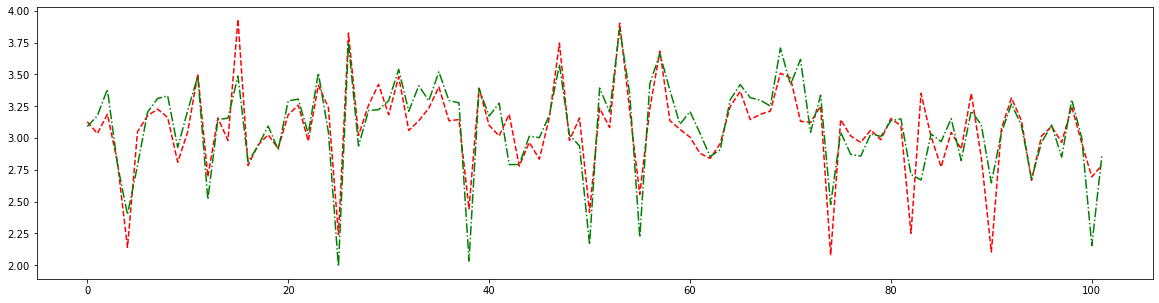

In [39]:
figure_prediction(y_test_log, lasso_reg_y_predict)

In [40]:
# testing set
lasso_alpha = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
for i in lasso_alpha:
    # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
    lasso_reg = Lasso(alpha=i, max_iter=1000)#(alpha表示正则的程度）
    # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
    lasso_reg.fit(X_train, y_train_log)
    # 模型评估
    # 获取系数等值
    lasso_reg_y_predict = lasso_reg.predict(X_test)
    lasso_reg_score = r2_score(y_test_log, lasso_reg_y_predict)
    print ("alpha:{:,}   ".format(i), "R^2 score:{:,.10f}".format(lasso_reg_score))
# for i in lasso_alpha:
#     print(i)
#     test_result(X_train_scaled,y_train,test_X_scaled,y_test,Lasso(alpha=i))

alpha:0.001    R^2 score:0.6650999820
alpha:0.005    R^2 score:0.6546190310
alpha:0.01    R^2 score:0.6417697622
alpha:0.02    R^2 score:0.6328493424
alpha:0.03    R^2 score:0.6415675272
alpha:0.04    R^2 score:0.6460503059
alpha:0.05    R^2 score:0.6492738236
alpha:0.1    R^2 score:0.6336269406


### 方法六: ElasticNet回归 log

In [41]:
# training set
en_reg = grid_search(ElasticNet(), X_train, y_train_log, {'alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 1], 'l1_ratio':[0.1, 0.3, 0.5, 0.7], 'max_iter':[100000]})
# 利用最佳模型来进行预测
en_reg_y_predict = en_reg.predict(X_test)
en_score = r2_score(y_test_log, en_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(en_score))
en_reg_y_predict

Parameters are {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} for the optimal model.
Optimal model has best score 0.7916181036.
{'alpha': 0.001, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7911656427
{'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7911517675
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7911299549
{'alpha': 0.001, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.7911892188
{'alpha': 0.005, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7914480571
{'alpha': 0.005, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7914652171
{'alpha': 0.005, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7910024757
{'alpha': 0.005, 'l1_ratio': 0.7, 'max_iter': 100000} Test score: 0.7897407637
{'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 100000} Test score: 0.7916181036
{'alpha': 0.01, 'l1_ratio': 0.3, 'max_iter': 100000} Test score: 0.7902122248
{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 100000} Test score: 0.7860937008


array([3.08074341, 3.18676406, 3.37554243, 2.79783265, 2.40489059,
       2.78100209, 3.20082073, 3.30956821, 3.3254179 , 2.93643662,
       3.21247009, 3.48670967, 2.53106509, 3.14461419, 3.15194114,
       3.47739188, 2.82024303, 2.94255896, 3.08315087, 2.9124471 ,
       3.28886392, 3.30413509, 3.04565409, 3.50848071, 3.05127257,
       2.00277685, 3.74193394, 2.94019169, 3.20963909, 3.21839263,
       3.29642008, 3.53232377, 3.20625867, 3.405273  , 3.29321507,
       3.51656203, 3.29437513, 3.27089158, 2.03733896, 3.3799811 ,
       3.17555947, 3.27101042, 2.78998787, 2.78769443, 3.01775092,
       2.99755586, 3.17671249, 3.56935149, 3.02769854, 2.93579796,
       2.16486956, 3.38589108, 3.20359557, 3.85091796, 3.34048688,
       2.21504838, 3.41447043, 3.66530009, 3.37731452, 3.10630967,
       3.20899643, 3.03979593, 2.85294552, 2.91507549, 3.30443113,
       3.41818955, 3.3121872 , 3.29509621, 3.24551468, 3.70093482,
       3.42314491, 3.62135894, 3.05117823, 3.33284194, 2.49609

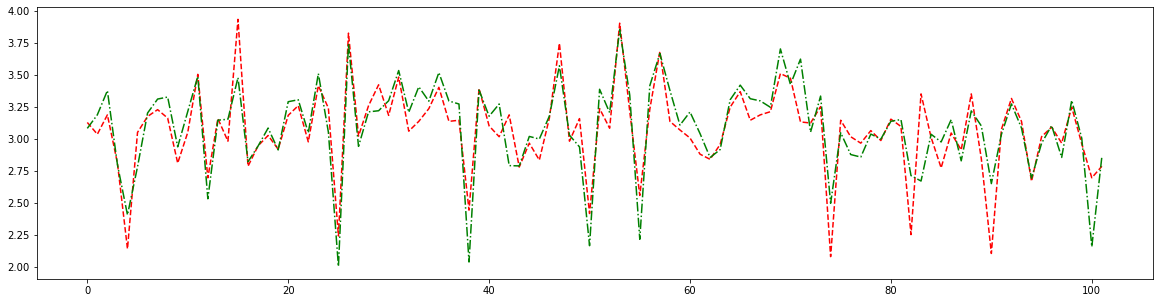

In [42]:
figure_prediction(y_test_log, en_reg_y_predict)

In [43]:
# testing set
en_alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 1]
en_l1_ratio = [0.1, 0.3, 0.5, 0.7]
for i in en_alpha:
    for j in en_l1_ratio:
        # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
        en_reg = ElasticNet(alpha=i, l1_ratio=j, max_iter=100000)#(alpha表示正则的程度）
        # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
        en_reg.fit(X_train, y_train_log)
        # 模型评估
        # 获取系数等值
        en_reg_y_predict = en_reg.predict(X_test)
        en_reg_score = r2_score(y_test_log, en_reg_y_predict)
        print ("alpha:{:,}   ".format(i), "l1_ratio:{:,}   ".format(j), "R^2 score:{:,.10f}".format(en_reg_score))

alpha:0.001    l1_ratio:0.1    R^2 score:0.6648157861
alpha:0.001    l1_ratio:0.3    R^2 score:0.6649911366
alpha:0.001    l1_ratio:0.5    R^2 score:0.6651022403
alpha:0.001    l1_ratio:0.7    R^2 score:0.6651494531
alpha:0.005    l1_ratio:0.1    R^2 score:0.6653113952
alpha:0.005    l1_ratio:0.3    R^2 score:0.6645727723
alpha:0.005    l1_ratio:0.5    R^2 score:0.6627851587
alpha:0.005    l1_ratio:0.7    R^2 score:0.6601520515
alpha:0.01    l1_ratio:0.1    R^2 score:0.6651039564
alpha:0.01    l1_ratio:0.3    R^2 score:0.6613411255
alpha:0.01    l1_ratio:0.5    R^2 score:0.6545144325
alpha:0.01    l1_ratio:0.7    R^2 score:0.6445180619
alpha:0.05    l1_ratio:0.1    R^2 score:0.6539764038
alpha:0.05    l1_ratio:0.3    R^2 score:0.6382781036
alpha:0.05    l1_ratio:0.5    R^2 score:0.6404251957
alpha:0.05    l1_ratio:0.7    R^2 score:0.6456137514
alpha:0.1    l1_ratio:0.1    R^2 score:0.6469190967
alpha:0.1    l1_ratio:0.3    R^2 score:0.6466935971
alpha:0.1    l1_ratio:0.5    R^2 score:0

## 6.2集成回归模型

### 方法七：随机森林

In [44]:
# training set
# param_grid = {
#     'n_estimators':[5,10,20,50,100,200], # 决策树的个数
#     'max_depth':[3,5,7], # 最大树身，树太深会造成过拟合
#     'max_features':[0.6,0.7,0.8,1] # 决策划分时考虑的最大特征数
# }
rf_reg = grid_search(RandomForestRegressor(), X_train, y_train, {'n_estimators':[5,10,20,50,100,200], 'max_depth':[3,5,7], 'max_features':[0.6,0.7,0.8,1]})
# 利用最佳模型来进行预测
rf_reg_y_predict = rf_reg.predict(X_test)
rf_score = r2_score(y_test, rf_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(rf_score))
rf_reg_y_predict

Parameters are {'max_depth': 7, 'max_features': 0.6, 'n_estimators': 100} for the optimal model.
Optimal model has best score 0.8826214621.
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 5} Test score: 0.7866082133
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 10} Test score: 0.7952755394
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 20} Test score: 0.8176071513
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 50} Test score: 0.8168268850
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 100} Test score: 0.8280885084
{'max_depth': 3, 'max_features': 0.6, 'n_estimators': 200} Test score: 0.8262751830
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 5} Test score: 0.7848536875
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 10} Test score: 0.8082206621
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 20} Test score: 0.8249306911
{'max_depth': 3, 'max_features': 0.7, 'n_estimators': 50} Test score: 0.8259548263
{'max_depth': 3, 'max_features

array([20.9247371 , 22.6490782 , 23.86461594, 15.38357147, 12.07072077,
       17.41204233, 20.74887723, 24.57808256, 21.63751868, 16.14552257,
       21.19711525, 33.32665336, 15.52617987, 21.20175462, 22.27398625,
       39.13066181, 16.02972502, 17.30162152, 20.56213152, 18.83916204,
       24.13933158, 24.80815364, 22.55673577, 26.82237934, 20.20176673,
        9.17534923, 46.27367937, 17.56317892, 24.53841733, 24.20221892,
       25.22589008, 28.28938113, 21.53050142, 24.92839262, 25.88857663,
       27.99377201, 28.48124849, 24.72889259,  6.75800392, 24.57469644,
       20.9656179 , 20.69128592, 13.67174502, 12.15724956, 20.33976094,
       19.44980387, 21.44081133, 37.43723461, 20.27597856, 19.98659105,
        7.42929327, 27.18222752, 21.69502009, 49.03684921, 23.14643456,
       12.51434792, 26.20282744, 45.53470201, 24.60431227, 21.26726655,
       20.73715173, 20.09927341, 14.58173108, 21.93989294, 25.44710013,
       29.42581945, 23.22304966, 21.42196027, 21.52631768, 32.49

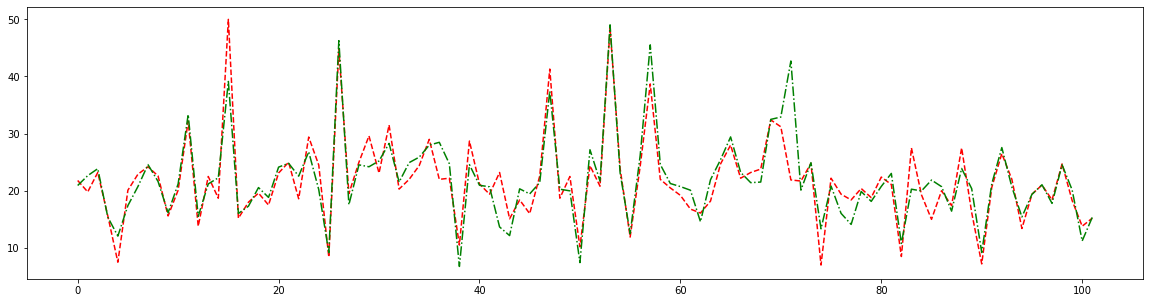

In [45]:
figure_prediction(y_test, rf_reg_y_predict)

In [46]:
# testing set
rf_n_estimators = [5, 10, 20, 50, 100, 200]
rf_max_depth = [3, 5, 7]
rf_max_features = [0.6, 0.7, 0.8, 1]
for i in rf_n_estimators:
    for j in rf_max_depth:
        for k in rf_max_features:
            # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
            rf_reg = RandomForestRegressor(n_estimators=i, max_depth=j, max_features=k)#(alpha表示正则的程度）
            # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
            rf_reg.fit(X_train, y_train)
            # 模型评估
            # 获取系数等值
            rf_reg_y_predict = rf_reg.predict(X_test)
            rf_reg_score = r2_score(y_test, rf_reg_y_predict)
            print ("n_estimators:{:,}   ".format(i), "max_depth:{:,}   ".format(j), "max_features:{:,}   ".format(k), "R^2 score:{:,.10f}".format(rf_reg_score))

n_estimators:5    max_depth:3    max_features:0.6    R^2 score:0.5539904456
n_estimators:5    max_depth:3    max_features:0.7    R^2 score:0.6214353611
n_estimators:5    max_depth:3    max_features:0.8    R^2 score:0.5724300946
n_estimators:5    max_depth:3    max_features:1    R^2 score:0.4992146426
n_estimators:5    max_depth:5    max_features:0.6    R^2 score:0.7584146499
n_estimators:5    max_depth:5    max_features:0.7    R^2 score:0.7154358980
n_estimators:5    max_depth:5    max_features:0.8    R^2 score:0.6821453706
n_estimators:5    max_depth:5    max_features:1    R^2 score:0.3774315236
n_estimators:5    max_depth:7    max_features:0.6    R^2 score:0.7373435421
n_estimators:5    max_depth:7    max_features:0.7    R^2 score:0.7322193597
n_estimators:5    max_depth:7    max_features:0.8    R^2 score:0.7011112895
n_estimators:5    max_depth:7    max_features:1    R^2 score:0.6594239221
n_estimators:10    max_depth:3    max_features:0.6    R^2 score:0.7280983182
n_estimators:10  

### 方法八： 极端随机森林回归

In [47]:
et_reg = grid_search(ExtraTreesRegressor(), X_train, y_train, {'n_estimators':[50,100,200,300,400], 'max_features':[1,2,3,4]})
# 利用最佳模型来进行预测
et_reg_y_predict = et_reg.predict(X_test)
et_score = r2_score(y_test, et_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(et_score))
et_reg_y_predict

Parameters are {'max_features': 4, 'n_estimators': 200} for the optimal model.
Optimal model has best score 0.8976407756.
{'max_features': 1, 'n_estimators': 50} Test score: 0.8270061066
{'max_features': 1, 'n_estimators': 100} Test score: 0.8454939750
{'max_features': 1, 'n_estimators': 200} Test score: 0.8329977459
{'max_features': 1, 'n_estimators': 300} Test score: 0.8404572127
{'max_features': 1, 'n_estimators': 400} Test score: 0.8344021397
{'max_features': 2, 'n_estimators': 50} Test score: 0.8667366589
{'max_features': 2, 'n_estimators': 100} Test score: 0.8663736709
{'max_features': 2, 'n_estimators': 200} Test score: 0.8688479452
{'max_features': 2, 'n_estimators': 300} Test score: 0.8735316591
{'max_features': 2, 'n_estimators': 400} Test score: 0.8700467532
{'max_features': 3, 'n_estimators': 50} Test score: 0.8835588661
{'max_features': 3, 'n_estimators': 100} Test score: 0.8859054486
{'max_features': 3, 'n_estimators': 200} Test score: 0.8869331640
{'max_features': 3, 'n_

array([21.84  , 21.881 , 24.0175, 15.636 ,  9.921 , 17.3965, 21.7695,
       24.549 , 22.735 , 17.512 , 21.887 , 32.9895, 15.986 , 21.643 ,
       21.1165, 46.168 , 16.9855, 18.1095, 21.1775, 18.1335, 24.5325,
       25.226 , 23.2045, 29.245 , 21.182 ,  9.28  , 45.041 , 18.564 ,
       23.6265, 26.3795, 26.395 , 32.854 , 21.0575, 26.514 , 26.153 ,
       28.192 , 24.4115, 24.3715,  7.1015, 25.171 , 20.891 , 21.983 ,
       14.988 , 13.506 , 19.721 , 20.3935, 22.648 , 40.9895, 19.866 ,
       20.385 ,  8.5685, 26.8775, 21.715 , 48.5725, 23.931 , 12.462 ,
       27.4245, 43.9565, 25.757 , 22.9815, 21.044 , 20.2645, 15.4825,
       21.5775, 27.662 , 29.6245, 24.272 , 23.554 , 22.515 , 34.1725,
       32.9355, 39.199 , 20.455 , 25.031 , 11.677 , 21.247 , 17.184 ,
       14.7245, 19.4375, 19.3315, 22.3515, 21.9725, 11.409 , 15.99  ,
       19.715 , 23.5635, 20.7365, 16.8465, 22.4505, 20.2055, 10.019 ,
       22.1655, 24.3545, 20.8275, 18.272 , 19.4565, 21.375 , 17.9245,
       24.73  , 20.1

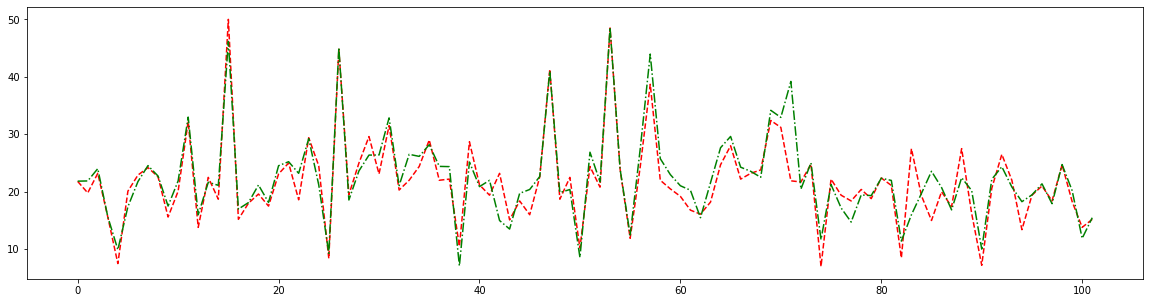

In [48]:
figure_prediction(y_test, et_reg_y_predict)

In [49]:
# testing set
et_n_estimators = [50, 100, 200, 300, 400]
et_max_features = [1,2,3,4]
for i in rf_n_estimators:
    for j in rf_max_features:
        # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
        et_reg = ExtraTreesRegressor(n_estimators=i, max_features=j)#(alpha表示正则的程度）
        # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
        et_reg.fit(X_train, y_train)
        # 模型评估
        # 获取系数等值
        et_reg_y_predict = et_reg.predict(X_test)
        et_reg_score = r2_score(y_test, et_reg_y_predict)
        print ("n_estimators:{:,}   ".format(i), "max_features:{:,}   ".format(j), "R^2 score:{:,.10f}".format(et_reg_score))

n_estimators:5    max_features:0.6    R^2 score:0.7527995663
n_estimators:5    max_features:0.7    R^2 score:0.7954575359
n_estimators:5    max_features:0.8    R^2 score:0.7826232713
n_estimators:5    max_features:1    R^2 score:0.5789560655
n_estimators:10    max_features:0.6    R^2 score:0.8106734839
n_estimators:10    max_features:0.7    R^2 score:0.7810167574
n_estimators:10    max_features:0.8    R^2 score:0.8181011823
n_estimators:10    max_features:1    R^2 score:0.7827042311
n_estimators:20    max_features:0.6    R^2 score:0.8159092555
n_estimators:20    max_features:0.7    R^2 score:0.8400951257
n_estimators:20    max_features:0.8    R^2 score:0.8433118379
n_estimators:20    max_features:1    R^2 score:0.6938771146
n_estimators:50    max_features:0.6    R^2 score:0.8322995893
n_estimators:50    max_features:0.7    R^2 score:0.8243194467
n_estimators:50    max_features:0.8    R^2 score:0.7999331138
n_estimators:50    max_features:1    R^2 score:0.7801778511
n_estimators:100    

### 方法九：梯度提升回归

In [50]:
gb_reg = grid_search(GradientBoostingRegressor(), X_train, y_train, {'n_estimators':[10,50,100,200,300], 'max_depth':[3,4,5,6], 'max_features':[1,2,3], 'subsample':[1], 'learning_rate':[0.1]})
# 利用最佳模型来进行预测
gb_reg_y_predict = gb_reg.predict(X_test)
gb_score = r2_score(y_test, gb_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(gb_score))
gb_reg_y_predict

Parameters are {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 3, 'n_estimators': 300, 'subsample': 1} for the optimal model.
Optimal model has best score 0.8977984322.
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 10, 'subsample': 1} Test score: 0.4771579831
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 50, 'subsample': 1} Test score: 0.8243833157
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 100, 'subsample': 1} Test score: 0.8529845390
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 200, 'subsample': 1} Test score: 0.8748655270
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 1, 'n_estimators': 300, 'subsample': 1} Test score: 0.8740963364
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 2, 'n_estimators': 10, 'subsample': 1} Test score: 0.5908421801
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 2, 'n_estimators': 50, 'subsample': 1} Test score: 0

array([20.20230254, 22.23243111, 23.83244899, 15.31730519,  9.32221681,
       17.15127443, 20.45224163, 23.53891286, 22.64297356, 13.74812226,
       19.90171678, 32.6284558 , 13.88143552, 20.72483719, 21.33554947,
       28.47145848, 16.97449424, 15.58082151, 20.33382113, 17.02230053,
       22.81845307, 24.09914495, 21.95584128, 30.92439372, 19.42538964,
        7.32219891, 46.3279219 , 12.88206329, 27.64692891, 24.93973306,
       25.65908047, 31.2883709 , 20.18262806, 25.99204511, 24.98260701,
       29.15897613, 27.28616063, 22.64179388,  3.22738454, 21.29088986,
       20.01494753, 20.56685325, 13.19299604, 11.30522253, 19.52462275,
       14.1177955 , 22.82282711, 39.36094752, 17.05016532, 19.3856091 ,
        6.60867154, 27.11110918, 21.34375044, 50.76496671, 23.08480406,
       18.35918817, 28.38021077, 43.91272652, 23.23174108, 17.54860105,
       17.85715929, 17.6089874 , 15.18656715, 19.42472687, 24.96399845,
       28.99548522, 23.17615763, 22.3601656 , 22.31502479, 32.79

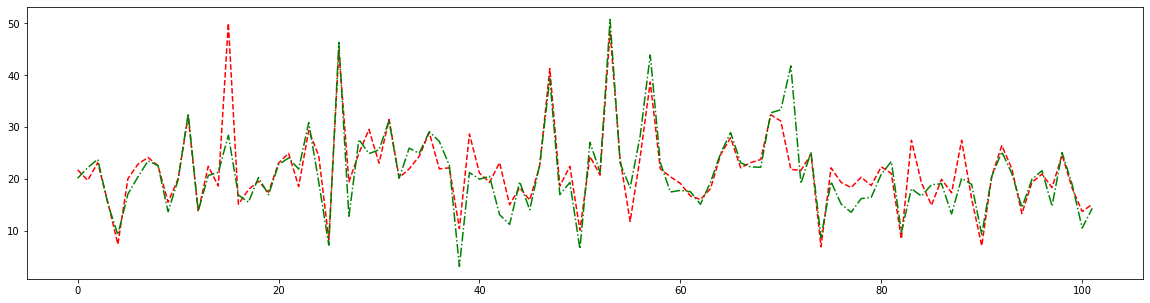

In [51]:
figure_prediction(y_test, gb_reg_y_predict)

In [52]:
# testing set
gb_n_estimators = [10, 50, 100, 200, 300]
gb_max_depth = [3, 4, 5, 6]
gb_max_features = [1, 2, 3]
for i in gb_n_estimators:
    for j in gb_max_depth:
        for k in gb_max_features:
            # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
            gb_reg = GradientBoostingRegressor(n_estimators=i, max_depth=j, max_features=k, subsample=1)#(alpha表示正则的程度）
            # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
            gb_reg.fit(X_train, y_train)
            # 模型评估
            # 获取系数等值
            gb_reg_y_predict = gb_reg.predict(X_test)
            gb_reg_score = r2_score(y_test, gb_reg_y_predict)
            print ("n_estimators:{:,}   ".format(i), "max_depth:{:,}   ".format(j), "max_features:{:,}   ".format(k), "subsample:1   learning_rate:0.1   ", "R^2 score:{:,.10f}".format(gb_reg_score))

n_estimators:10    max_depth:3    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.4927388112
n_estimators:10    max_depth:3    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.4792998237
n_estimators:10    max_depth:3    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.6716475645
n_estimators:10    max_depth:4    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.5837164154
n_estimators:10    max_depth:4    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.6267468834
n_estimators:10    max_depth:4    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.6375520834
n_estimators:10    max_depth:5    max_features:1    subsample:1   learning_rate:0.1    R^2 score:0.5425330539
n_estimators:10    max_depth:5    max_features:2    subsample:1   learning_rate:0.1    R^2 score:0.6493635410
n_estimators:10    max_depth:5    max_features:3    subsample:1   learning_rate:0.1    R^2 score:0.6448834098
n_estimato

### 方法十：AdaBoost log

In [53]:
ab_reg = grid_search(AdaBoostRegressor(), X_train, y_train_log, {'n_estimators': [50,100,200], 'learning_rate': [0.01,0.05,0.1,0.3,1],'loss':['linear','square','exponential']})
# 利用最佳模型来进行预测
ab_reg_y_predict = ab_reg.predict(X_test)
ab_score = r2_score(y_test_log, ab_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(ab_score))
ab_reg_y_predict

Parameters are {'learning_rate': 1, 'loss': 'square', 'n_estimators': 200} for the optimal model.
Optimal model has best score 0.8392689785.
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50} Test score: 0.7940098096
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 100} Test score: 0.7846130725
{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 200} Test score: 0.8075633497
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 50} Test score: 0.7905231229
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 100} Test score: 0.7939086320
{'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 200} Test score: 0.8115637315
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 50} Test score: 0.7968725814
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 100} Test score: 0.7910425325
{'learning_rate': 0.01, 'loss': 'exponential', 'n_estimators': 200} Test score: 0.8044452556
{'learning_rate': 0.05, 'loss': 'linear', 'n_estimators

array([3.06880065, 3.27420031, 3.26590017, 2.84264434, 2.32272175,
       2.81536393, 3.07377225, 3.31859503, 3.15560466, 2.84264434,
       3.10516882, 3.36681224, 2.77975522, 3.10731278, 3.16099113,
       3.61190477, 2.92576578, 2.80538754, 3.04679345, 2.97144208,
       3.2482665 , 3.32252889, 3.2482665 , 3.38014744, 3.06230255,
       2.23596172, 3.7754453 , 2.86043045, 3.31797716, 3.13274498,
       3.2929474 , 3.4633232 , 3.12493054, 3.29106244, 3.31797716,
       3.37465364, 3.05370859, 3.25823812, 2.06865904, 3.24527012,
       3.08328586, 3.09210732, 2.69681174, 2.58151482, 3.05107457,
       2.99922196, 3.06880065, 3.60555848, 3.00422355, 3.00963041,
       2.14216214, 3.36102973, 3.0984849 , 3.7754453 , 3.19280849,
       2.31278333, 3.37465364, 3.75078048, 3.10947564, 3.12616825,
       3.07057096, 3.06154502, 2.7903215 , 3.0902633 , 3.34663223,
       3.47689972, 3.35573518, 3.10833489, 3.07946834, 3.52947102,
       3.49223349, 3.7783688 , 3.01414548, 3.19076909, 2.46375

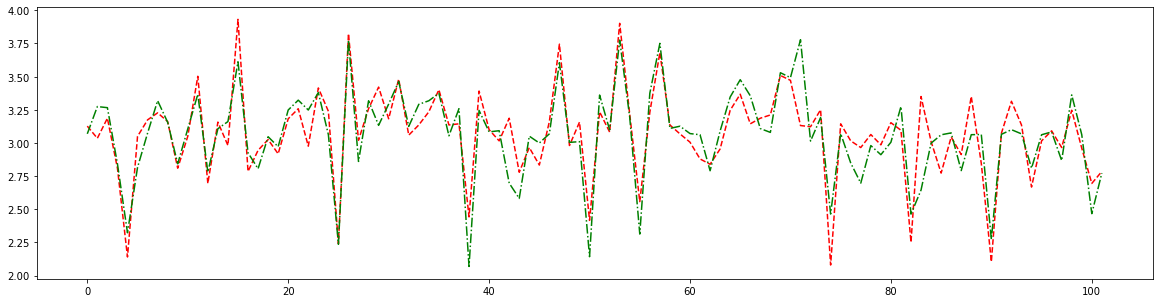

In [54]:
figure_prediction(y_test_log, ab_reg_y_predict)

In [55]:
# testing set
ab_n_estimators = [50, 100, 200]
ab_learning_rate = [0.01, 0.05, 0.1, 0.3, 1]
ab_loss = ['linear', 'square', 'exponential']
for i in ab_n_estimators:
    for j in ab_learning_rate:
        for k in ab_loss:
            # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
            ab_reg = AdaBoostRegressor(n_estimators=i, learning_rate=j, loss=k)#(alpha表示正则的程度）
            # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
            ab_reg.fit(X_train, y_train_log)
            # 模型评估
            # 获取系数等值
            ab_reg_y_predict = ab_reg.predict(X_test)
            ab_reg_score = r2_score(y_test_log, ab_reg_y_predict)
            print ("n_estimators:{:,}   ".format(i), "learning_rate:{:,}   ".format(j),  "loss:{}   ".format(k),"R^2 score:{:,.10f}".format(ab_reg_score))

n_estimators:50    learning_rate:0.01    loss:linear    R^2 score:0.6689423799
n_estimators:50    learning_rate:0.01    loss:square    R^2 score:0.6494128454
n_estimators:50    learning_rate:0.01    loss:exponential    R^2 score:0.6702483047
n_estimators:50    learning_rate:0.05    loss:linear    R^2 score:0.6732160937
n_estimators:50    learning_rate:0.05    loss:square    R^2 score:0.6880494850
n_estimators:50    learning_rate:0.05    loss:exponential    R^2 score:0.6793884111
n_estimators:50    learning_rate:0.1    loss:linear    R^2 score:0.6723794774
n_estimators:50    learning_rate:0.1    loss:square    R^2 score:0.6894252534
n_estimators:50    learning_rate:0.1    loss:exponential    R^2 score:0.6741233513
n_estimators:50    learning_rate:0.3    loss:linear    R^2 score:0.6884515975
n_estimators:50    learning_rate:0.3    loss:square    R^2 score:0.6741356011
n_estimators:50    learning_rate:0.3    loss:exponential    R^2 score:0.6848345097
n_estimators:50    learning_rate:1    

## 6.3SVM

### 方法十一：SVR

In [56]:
svr_reg = grid_search(SVR(), X_train, y_train, {'C':[10, 20, 50, 100], 'gamma':[0.01, 0.1, 0.125, 0.25, 0.5 ,1]})
# 利用最佳模型来进行预测
svr_reg_y_predict = svr_reg.predict(X_test)
svr_score = r2_score(y_test, svr_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(svr_score))
svr_reg_y_predict

Parameters are {'C': 50, 'gamma': 0.1} for the optimal model.
Optimal model has best score 0.8662486054.
{'C': 10, 'gamma': 0.01} Test score: 0.7811292139
{'C': 10, 'gamma': 0.1} Test score: 0.8181581087
{'C': 10, 'gamma': 0.125} Test score: 0.8087491585
{'C': 10, 'gamma': 0.25} Test score: 0.7629039553
{'C': 10, 'gamma': 0.5} Test score: 0.6834551518
{'C': 10, 'gamma': 1} Test score: 0.5509683296
{'C': 20, 'gamma': 0.01} Test score: 0.8107601630
{'C': 20, 'gamma': 0.1} Test score: 0.8494442077
{'C': 20, 'gamma': 0.125} Test score: 0.8443662561
{'C': 20, 'gamma': 0.25} Test score: 0.8026154560
{'C': 20, 'gamma': 0.5} Test score: 0.7345633840
{'C': 20, 'gamma': 1} Test score: 0.6197812614
{'C': 50, 'gamma': 0.01} Test score: 0.8374376343
{'C': 50, 'gamma': 0.1} Test score: 0.8662486054
{'C': 50, 'gamma': 0.125} Test score: 0.8579461468
{'C': 50, 'gamma': 0.25} Test score: 0.8192099532
{'C': 50, 'gamma': 0.5} Test score: 0.7493905126
{'C': 50, 'gamma': 1} Test score: 0.6319852771
{'C': 1

array([19.87152924, 20.49538081, 22.76739038, 12.54787684,  9.82736901,
       21.98367367, 21.29309241, 26.07090932, 24.42224271, 21.79482628,
       20.56534147, 37.58625319, 14.96653895, 22.55501123, 21.25131727,
       49.60950627, 16.67223368, 18.22640626, 21.03621126, 17.55021438,
       24.52687778, 25.86172233, 21.74697088, 33.28946477, 24.0598071 ,
        7.85099503, 48.37653217, 19.79218709, 21.3043241 , 27.84433588,
       25.26307779, 33.76602033, 20.40853171, 28.21604537, 25.91008698,
       29.85578926, 23.89266659, 24.13590474,  6.44070549, 31.65943457,
       21.489549  , 20.43729266, 15.3600287 , 14.13928301, 19.46629955,
       18.04453344, 23.23857755, 39.73238623, 18.71074118, 18.93600589,
        6.13525701, 28.09144119, 22.59007192, 50.13806378, 24.176318  ,
        9.23253001, 25.27232473, 43.06364439, 25.4097323 , 21.04417501,
       19.57099518, 20.35341696, 15.07724554, 19.77554318, 25.07224111,
       30.85570909, 24.88681986, 24.92096374, 22.3170558 , 34.00

In [57]:
submission = {"prediction":svr_reg_y_predict}
submission = pd.DataFrame(submission)
submission.to_csv('svr_regression.csv')

In [58]:
import joblib
joblib.dump(svr_reg, "./test.pkl")

['./test.pkl']

In [59]:
estimator = joblib.load("./test.pkl")
estimator_y_predict = estimator.predict(X_test)
estimator_score = r2_score(y_test, estimator_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(estimator_score))
# X_train = transfer.fit_transform(X_train)
# X_test = transfer.fit_transform(X_test)
# print(X_test[0])
# X_test0 = [[]]
# X_test0[1][13]=X_test[0]
# X_test0[0] = X_test[0]
# print(X_test0)
y_predict = estimator.predict(X_test0)
print(y_predict)
print(y_predict[0])
estimator_y_predict

Optimal model has R^2 score 0.8271775795 on test data.
[19.9476608  19.9476608  20.49589828 22.81005876 12.56296665  9.82384935
 21.94105272 21.27253521 26.13701044 24.47133451 21.86669513 20.53895762
 37.72060675 15.06995368 22.57074851 21.25347465 49.72968853 16.60701972
 18.19337583 20.99748281 17.48073521 24.567994   25.91852189 21.74478961
 33.40027002 24.02547046  7.81072737 48.49173015 19.72289164 21.28154814
 27.87571849 25.40173388 33.90464184 20.41162943 28.26566702 25.97457425
 29.82642695 23.92682166 24.19648405  6.34714713 31.70841704 21.457332
 20.49097952 15.24248742 13.95928135 19.4480714  17.996545   23.24971621
 39.82259652 18.68051665 18.88679436  5.96600319 28.14854146 22.58246724
 50.10133479 24.21379591  9.1007311  25.2431354  43.14808284 25.48893056
 21.0593187  19.52183387 20.29891394 14.96679483 19.7879952  25.20809733
 30.97304982 24.94909781 24.95945306 22.30316942 34.07200696 31.87169942
 32.88356903 23.92846255 25.63266875  8.85264727 21.18282751 14.2556326

array([19.87152924, 20.49538081, 22.76739038, 12.54787684,  9.82736901,
       21.98367367, 21.29309241, 26.07090932, 24.42224271, 21.79482628,
       20.56534147, 37.58625319, 14.96653895, 22.55501123, 21.25131727,
       49.60950627, 16.67223368, 18.22640626, 21.03621126, 17.55021438,
       24.52687778, 25.86172233, 21.74697088, 33.28946477, 24.0598071 ,
        7.85099503, 48.37653217, 19.79218709, 21.3043241 , 27.84433588,
       25.26307779, 33.76602033, 20.40853171, 28.21604537, 25.91008698,
       29.85578926, 23.89266659, 24.13590474,  6.44070549, 31.65943457,
       21.489549  , 20.43729266, 15.3600287 , 14.13928301, 19.46629955,
       18.04453344, 23.23857755, 39.73238623, 18.71074118, 18.93600589,
        6.13525701, 28.09144119, 22.59007192, 50.13806378, 24.176318  ,
        9.23253001, 25.27232473, 43.06364439, 25.4097323 , 21.04417501,
       19.57099518, 20.35341696, 15.07724554, 19.77554318, 25.07224111,
       30.85570909, 24.88681986, 24.92096374, 22.3170558 , 34.00

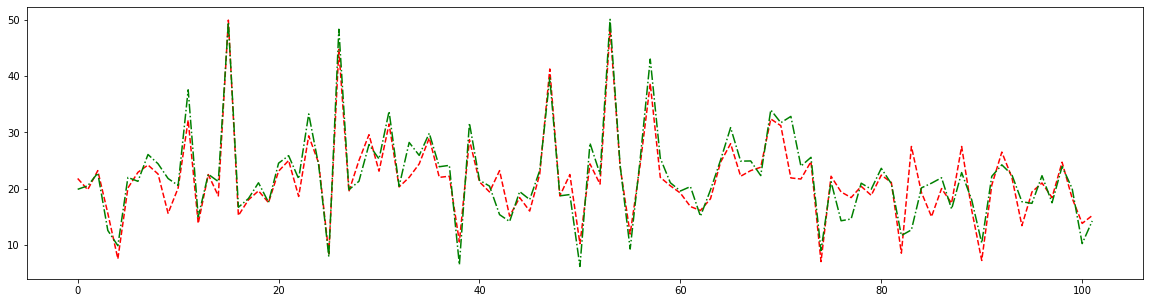

In [60]:
figure_prediction(y_test, svr_reg_y_predict)

In [61]:
# testing set
svr_C = [10, 20, 50, 100]
svr_gamma = [0.01, 0.1, 0.125, 0.25, 0.5 ,1]
for i in svr_C:
    for j in svr_gamma:
        # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
        svr_reg =SVR(C=i, gamma=j)#(alpha表示正则的程度）
        # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
        svr_reg.fit(X_train, y_train)
        # 模型评估
        # 获取系数等值
        svr_reg_y_predict = svr_reg.predict(X_test)
        svr_reg_score = r2_score(y_test, svr_reg_y_predict)
        print ("C:{:,}   ".format(i), "gamma:{:,}   ".format(j), "R^2 score:{:,.10f}".format(gb_reg_score))

C:10    gamma:0.01    R^2 score:0.8142043317
C:10    gamma:0.1    R^2 score:0.8142043317
C:10    gamma:0.125    R^2 score:0.8142043317
C:10    gamma:0.25    R^2 score:0.8142043317
C:10    gamma:0.5    R^2 score:0.8142043317
C:10    gamma:1    R^2 score:0.8142043317
C:20    gamma:0.01    R^2 score:0.8142043317
C:20    gamma:0.1    R^2 score:0.8142043317
C:20    gamma:0.125    R^2 score:0.8142043317
C:20    gamma:0.25    R^2 score:0.8142043317
C:20    gamma:0.5    R^2 score:0.8142043317
C:20    gamma:1    R^2 score:0.8142043317
C:50    gamma:0.01    R^2 score:0.8142043317
C:50    gamma:0.1    R^2 score:0.8142043317
C:50    gamma:0.125    R^2 score:0.8142043317
C:50    gamma:0.25    R^2 score:0.8142043317
C:50    gamma:0.5    R^2 score:0.8142043317
C:50    gamma:1    R^2 score:0.8142043317
C:100    gamma:0.01    R^2 score:0.8142043317
C:100    gamma:0.1    R^2 score:0.8142043317
C:100    gamma:0.125    R^2 score:0.8142043317
C:100    gamma:0.25    R^2 score:0.8142043317
C:100    gamma:0.5

### 6.4方法十二：K近邻

In [62]:
knn_reg = grid_search(KNeighborsRegressor(), X_train, y_train, {'weights': ['uniform', 'distance'], 'n_neighbors': [2,10,50,100]})
# 利用最佳模型来进行预测
knn_reg_y_predict = knn_reg.predict(X_test)
knn_score = r2_score(y_test, knn_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(knn_score))
knn_reg_y_predict

Parameters are {'n_neighbors': 2, 'weights': 'distance'} for the optimal model.
Optimal model has best score 0.7992073573.
{'n_neighbors': 2, 'weights': 'uniform'} Test score: 0.7773166813
{'n_neighbors': 2, 'weights': 'distance'} Test score: 0.7992073573
{'n_neighbors': 10, 'weights': 'uniform'} Test score: 0.7528970176
{'n_neighbors': 10, 'weights': 'distance'} Test score: 0.7828926306
{'n_neighbors': 50, 'weights': 'uniform'} Test score: 0.5980134330
{'n_neighbors': 50, 'weights': 'distance'} Test score: 0.6504070754
{'n_neighbors': 100, 'weights': 'uniform'} Test score: 0.4927007021
{'n_neighbors': 100, 'weights': 'distance'} Test score: 0.5584023006
Optimal model has R^2 score 0.7506150189 on test data.


array([20.87334007, 20.97900864, 24.83077808, 14.35673161,  7.91994102,
       20.08316087, 18.9       , 23.15397802, 24.12767545, 16.21036531,
       21.42933513, 43.14120429, 14.06232436, 22.25037019, 18.74598471,
       50.        , 15.05339763, 17.4938444 , 19.49920986, 18.34315548,
       22.91002214, 23.45351127, 22.78958991, 36.15561564, 21.54032728,
        7.9243468 , 47.54986182, 19.45980903, 21.19555254, 29.27153996,
       28.6328758 , 38.05656741, 20.61227775, 22.71896923, 25.53724315,
       26.35135165, 23.67968725, 24.19816285,  6.6957538 , 23.31997032,
       20.25980395, 23.83503983, 15.55907678, 13.24796983, 19.02398335,
       18.163155  , 26.470149  , 50.        , 18.602199  , 18.7828905 ,
        7.98408193, 27.53065698, 21.33239752, 50.        , 25.30633246,
        6.75084858, 20.78461397, 44.94160797, 27.10267562, 21.01200845,
       19.78826263, 19.58044055, 14.8509593 , 20.29241903, 23.41453741,
       28.0472898 , 24.59023769, 24.13485514, 20.14319096, 33.13

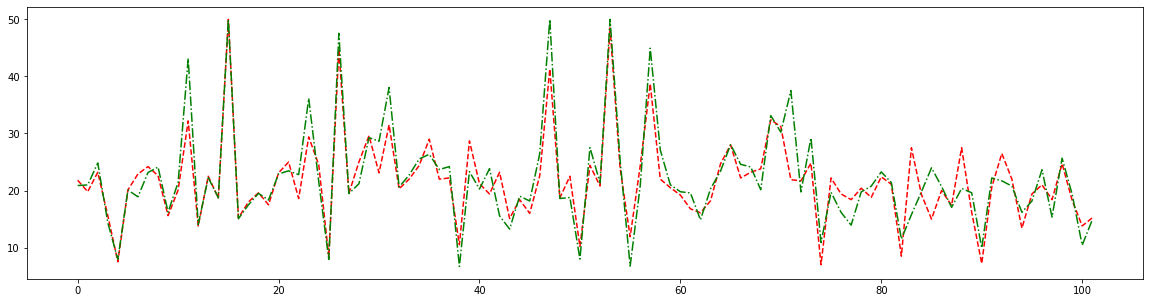

In [63]:
figure_prediction(y_test, knn_reg_y_predict)

In [64]:
# testing set
knn_weights = ['uniform', 'distance']
knn_n_neighbors = [2, 10, 50 ,100]
for i in knn_weights:
    for j in knn_n_neighbors:
        # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
        knn_reg =KNeighborsRegressor(weights=i, n_neighbors=j)#(alpha表示正则的程度）
        # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
        knn_reg.fit(X_train, y_train)
        # 模型评估
        # 获取系数等值
        knn_reg_y_predict = knn_reg.predict(X_test)
        knn_reg_score = r2_score(y_test, knn_reg_y_predict)
        print ("weights:{}   ".format(i), "n_neighbors:{:,}   ".format(j), "R^2 score:{:,.10f}".format(gb_reg_score))

weights:uniform    n_neighbors:2    R^2 score:0.8142043317
weights:uniform    n_neighbors:10    R^2 score:0.8142043317
weights:uniform    n_neighbors:50    R^2 score:0.8142043317
weights:uniform    n_neighbors:100    R^2 score:0.8142043317
weights:distance    n_neighbors:2    R^2 score:0.8142043317
weights:distance    n_neighbors:10    R^2 score:0.8142043317
weights:distance    n_neighbors:50    R^2 score:0.8142043317
weights:distance    n_neighbors:100    R^2 score:0.8142043317


### 6.5方法十三：内核岭回归

In [65]:
# training set
kridge_reg = grid_search(KernelRidge(),X_train,y_train,{'alpha':[0.3,0.4,0.5,0.6,0.7], 'kernel':["polynomial"], 'degree':[3],'coef0':[0.8,1,2,5,8]})
# 利用最佳模型来进行预测
kridge_reg_y_predict = kridge_reg.predict(X_test)
kridge_score = r2_score(y_test, kridge_reg_y_predict)
print("Optimal model has R^2 score {:,.10f} on test data.".format(kridge_score))
kridge_reg_y_predict

Parameters are {'alpha': 0.7, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} for the optimal model.
Optimal model has best score 0.8816650238.
{'alpha': 0.3, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8711053344
{'alpha': 0.3, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8702103945
{'alpha': 0.3, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8668731855
{'alpha': 0.3, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8609338024
{'alpha': 0.3, 'coef0': 8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8568511150
{'alpha': 0.4, 'coef0': 0.8, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8759010095
{'alpha': 0.4, 'coef0': 1, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8751285626
{'alpha': 0.4, 'coef0': 2, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8720110516
{'alpha': 0.4, 'coef0': 5, 'degree': 3, 'kernel': 'polynomial'} Test score: 0.8666393825
{'alpha': 0.4, 'coef0': 8, 'degree': 3, 'kernel'

array([24.44297955, 20.72907747, 24.28532545, 15.55751478,  7.027411  ,
       18.70658843, 20.9745426 , 26.69788697, 24.21075414, 14.62713738,
       21.28067667, 35.74156383, 18.34593805, 23.30766748, 21.64332136,
       56.9638935 , 15.30728125, 18.32742974, 23.62545916, 16.52478644,
       24.45060254, 25.57532217, 20.12469114, 32.61296685, 21.31713485,
        6.0289051 , 49.82106055, 18.10877812, 22.53019854, 25.96418869,
       26.40260839, 32.73642518, 20.9290007 , 27.41290184, 26.28183973,
       29.00872088, 24.71547373, 23.85789955,  3.38530598, 28.02370903,
       20.98244776, 20.59708919, 14.10983493, 16.32511834, 17.74564134,
       17.6696845 , 22.71549123, 39.95684277, 17.83909082, 17.91459286,
        4.97314672, 27.30007309, 21.71473905, 55.22590919, 24.85683138,
       11.77027576, 29.31831877, 48.99023881, 26.5480726 , 20.13260083,
       20.81331038, 18.75292452, 14.64929889, 19.87015127, 26.09550949,
       30.28913504, 25.27095534, 24.62279425, 25.19843193, 34.57

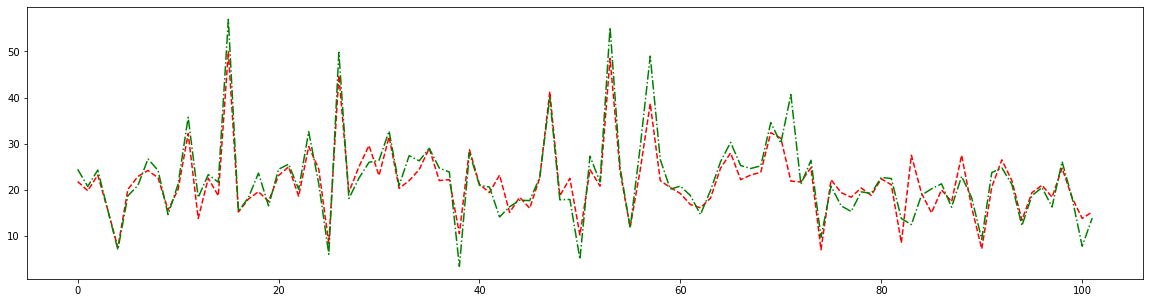

In [66]:
figure_prediction(y_test, kridge_reg_y_predict)

In [67]:
# testing set
kridge_alpha = [0.3, 0.4, 0.5, 0.6, 0.7]
kridge_coef0 = [0.8, 1, 2, 5, 8]
for i in kridge_alpha:
    for j in kridge_coef0:
        # 创建模型 实例化估计器 # 随机参数回归模块实例化一个对象
        kridge_reg = KernelRidge(alpha=i, coef0=j, kernel = 'polynomial', degree=3)#(alpha表示正则的程度）
        # 训练模型 fit 正规方程计算得到最优的可训练参数 # 用随机参数回归模块在训练集上进行拟合
        kridge_reg.fit(X_train, y_train)
        # 模型评估
        # 获取系数等值
        kridge_reg_y_predict = kridge_reg.predict(X_test)
        kridge_reg_score = r2_score(y_test, kridge_reg_y_predict)
        print ("alpha:{:,}   ".format(i), "coef0:{:,}   ".format(j), "kernel:polynomial   degree:3   ""R^2 score:{:,.10f}".format(kridge_reg_score))

alpha:0.3    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7759245821
alpha:0.3    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7717008320
alpha:0.3    coef0:2    kernel:polynomial   degree:3   R^2 score:0.7577021636
alpha:0.3    coef0:5    kernel:polynomial   degree:3   R^2 score:0.7317054269
alpha:0.3    coef0:8    kernel:polynomial   degree:3   R^2 score:0.7084900678
alpha:0.4    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7683609180
alpha:0.4    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7662448768
alpha:0.4    coef0:2    kernel:polynomial   degree:3   R^2 score:0.7571757880
alpha:0.4    coef0:5    kernel:polynomial   degree:3   R^2 score:0.7414990493
alpha:0.4    coef0:8    kernel:polynomial   degree:3   R^2 score:0.7260975136
alpha:0.5    coef0:0.8    kernel:polynomial   degree:3   R^2 score:0.7594549584
alpha:0.5    coef0:1    kernel:polynomial   degree:3   R^2 score:0.7589596815
alpha:0.5    coef0:2    kernel:polynomial   degree:3   R^2